# **Laboratorio 12: 🚀 Despliegue 🚀**

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### **Cuerpo Docente:**

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Eduardo Moya
- Ayudantes: Nicolás Ojeda, Melanie Peña, Valentina Rojas

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Carolina Nuñez
- Nombre de alumno 2: Alonso Uribe

### **Link de repositorio de GitHub:** [Repositorio💻](https://github.com/carinunez/Labs_MDS/)

## Temas a tratar

- Entrenamiento y registro de modelos usando MLFlow.
- Despliegue de modelo usando FastAPI
- Containerización del proyecto usando Docker

## Reglas:

- **Grupos de 2 personas**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar una solución a un problema a partir de ML
- Desplegar su solución usando MLFlow, FastAPI y Docker

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# **Introducción**

<p align="center">
  <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExODJnMHJzNzlkNmQweXoyY3ltbnZ2ZDlxY2c0aW5jcHNzeDNtOXBsdCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AbPdhwsMgjMjax5reo/giphy.gif" width="400">
</p>



Consumida en la tristeza el despido de Renacín, Smapina ha decaído en su desempeño, lo que se ha traducido en un irregular tratamiento del agua. Esto ha implicado una baja en la calidad del agua, llegando a haber algunos puntos de la comuna en la que el vital elemento no es apto para el consumo humano. Es por esto que la sanitaria pública de la municipalidad de Maipú se ha contactado con ustedes para que le entreguen una urgente solución a este problema (a la vez que dejan a Smapina, al igual que Renacín, sin trabajo 😔).

El problema que la empresa le ha solicitado resolver es el de elaborar un sistema que les permita saber si el agua es potable o no. Para esto, la sanitaria les ha proveido una base de datos con la lectura de múltiples sensores IOT colocados en diversas cañerías, conductos y estanques. Estos sensores señalan nueve tipos de mediciones químicas y más una etiqueta elaborada en laboratorio que indica si el agua es potable o no el agua.

La idea final es que puedan, en el caso que el agua no sea potable, dar un aviso inmediato para corregir el problema. Tenga en cuenta que parte del equipo docente vive en Maipú y su intoxicación podría implicar graves problemas para el cierre del curso.

Atributos:

1. pH value
2. Hardness
3. Solids (Total dissolved solids - TDS)
4. Chloramines
5. Sulfate
6. Conductivity
7. Organic_carbon
8. Trihalomethanes
9. Turbidity

Variable a predecir:

10. Potability (1 si es potable, 0 no potable)

Descripción de cada atributo se pueden encontrar en el siguiente link: [dataset](https://www.kaggle.com/adityakadiwal/water-potability)

# **1. Optimización de modelos con Optuna + MLFlow (2.0 puntos)**

El objetivo de esta sección es que ustedes puedan combinar Optuna con MLFlow para poder realizar la optimización de los hiperparámetros de sus modelos.

Como aún no hemos hablado nada sobre `MLFlow` cabe preguntarse: **¡¿Qué !"#@ es `MLflow`?!**

<p align="center">
  <img src="https://media.tenor.com/eusgDKT4smQAAAAC/matthew-perry-chandler-bing.gif" width="400">
</p>

## **MLFlow**

`MLflow` es una plataforma de código abierto que simplifica la gestión y seguimiento de proyectos de aprendizaje automático. Con sus herramientas, los desarrolladores pueden organizar, rastrear y comparar experimentos, además de registrar modelos y controlar versiones.

<p align="center">
  <img src="https://spark.apache.org/images/mlflow-logo.png" width="350">
</p>

Si bien esta plataforma cuenta con un gran número de herramientas y funcionalidades, en este laboratorio trabajaremos con dos:
1. **Runs**: Registro que constituye la información guardada tras la ejecución de un entrenamiento. Cada `run` tiene su propio run_id, el cual sirve como identificador para el entrenamiento en sí mismo. Dentro de cada `run` podremos acceder a información como los hiperparámetros utilizados, las métricas obtenidas, las librerías requeridas y hasta nos permite descargar el modelo entrenado.
2. **Experiments**: Se utilizan para agrupar y organizar diferentes ejecuciones de modelos (`runs`). En ese sentido, un experimento puede agrupar 1 o más `runs`. De esta manera, es posible también registrar métricas, parámetros y archivos (artefactos) asociados a cada experimento.

### **Todo bien pero entonces, ¿cómo se usa en la práctica `MLflow`?**

Es sencillo! Considerando un problema de machine learning genérico, podemos registrar la información relevante del entrenamiento ejecutando `mlflow.autolog()` antes entrenar nuestro modelo. Veamos este bonito ejemplo facilitado por los mismos creadores de `MLflow`:

```python
#!pip install mlflow
import mlflow # importar mlflow

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

db = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(db.data, db.target)

# Create and train models.
rf = RandomForestRegressor(n_estimators=100, max_depth=6, max_features=3)

mlflow.autolog() # registrar automáticamente información del entrenamiento
with mlflow.start_run(): # delimita inicio y fin del run
    # aquí comienza el run
    rf.fit(X_train, y_train) # train the model
    predictions = rf.predict(X_test) # Use the model to make predictions on the test dataset.
    # aquí termina el run
```

Si ustedes ejecutan el código anterior en sus máquinas locales (desde un jupyter notebook por ejemplo) se darán cuenta que en su directorio *root* se ha creado la carpeta `mlruns`. Esta carpeta lleva el tracking de todos los entrenamientos ejecutados desde el directorio root (importante: si se cambian de directorio y vuelven a ejecutar el código anterior, se creará otra carpeta y no tendrán acceso al entrenamiento anterior). Para visualizar estos entrenamientos, `MLflow` nos facilita hermosa interfaz visual a la que podemos acceder ejecutando:

```
mlflow ui
```

y luego pinchando en la ruta http://127.0.0.1:5000 que nos retorna la terminal. Veamos en vivo algunas de sus funcionalidades!

<p align="center">
  <img src="https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExZXVuM3A5MW1heDFpa21qbGlwN2pyc2VoNnZsMmRzODZxdnluemo2bCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3o84sq21TxDH6PyYms/giphy.gif" width="400">
</p>

Les dejamos también algunos comandos útiles:

- `mlflow.create_experiment("nombre_experimento")`: Les permite crear un nuevo experimento para agrupar entrenamientos
- `mlflow.log_metric("nombre_métrica", métrica)`: Les permite registrar una métrica *custom* bajo el nombre de "nombre_métrica"


## **1.1 Combinando Optuna + MLflow (2.0 puntos)**

Ahora que tenemos conocimiento de ambas herramientas, intentemos ahora combinarlas para **más sabor**. El objetivo de este apartado es simple: automatizar la optimización de los parámetros de nuestros modelos usando `Optuna` y registrando de forma automática cada resultado en `MLFlow`.

Considerando el objetivo planteado, se le pide completar la función `optimize_model`, la cual debe:
- **Optimizar los hiperparámetros del modelo `XGBoost` usando `Optuna`.**
- **Registrar cada entrenamiento en un experimento nuevo**, asegurándose de que la métrica `f1-score` se registre como `"valid_f1"`. No se deben guardar todos los experimentos en *Default*; en su lugar, cada `experiment` y `run` deben tener nombres interpretables, reconocibles y diferentes a los nombres por defecto (por ejemplo, para un run: "XGBoost con lr 0.1").
- **Guardar los gráficos de Optuna** dentro de una carpeta de artefactos de Mlflow llamada `/plots`.
- **Devolver el mejor modelo** usando la función `get_best_model` y serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
- **Guardar el código en `optimize.py`**. La ejecución de `python optimize.py` debería ejecutar la función `optimize_model`.
- **Guardar las versiones de las librerías utilizadas** en el desarrollo.
- **Respalde las configuraciones del modelo final y la importancia de las variables** en un gráfico dentro de la carpeta `/plots` creada anteriormente.

*Hint: Le puede ser útil revisar los parámetros que recibe `mlflow.start_run`*

```python
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model("runs:/" + best_model_id + "/model")

    return best_model
```

In [1]:
# !pip install mlflow
# pip install feature_engine

In [2]:
import mlflow
import optuna
import os
# con el submodulo de matplotlib, es más rapida la descarga de archivos
from optuna.visualization.matplotlib import (plot_optimization_history, plot_param_importances, 
                                    plot_parallel_coordinate)
import pickle
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import numpy as np
import pandas as pd


# Load data
data = pd.read_csv('water_potability.csv')
data.head()

C:\Users\caron\AppData\Roaming\Python\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [4]:
print('Info dataset')
print('\nShape: ', data.shape)
print('\nInfo:')
print(data.info())
print('\n Valores nulos \n')
print(data.isnull().sum())

Info dataset

Shape:  (3276, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None

 Valores nulos 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability         

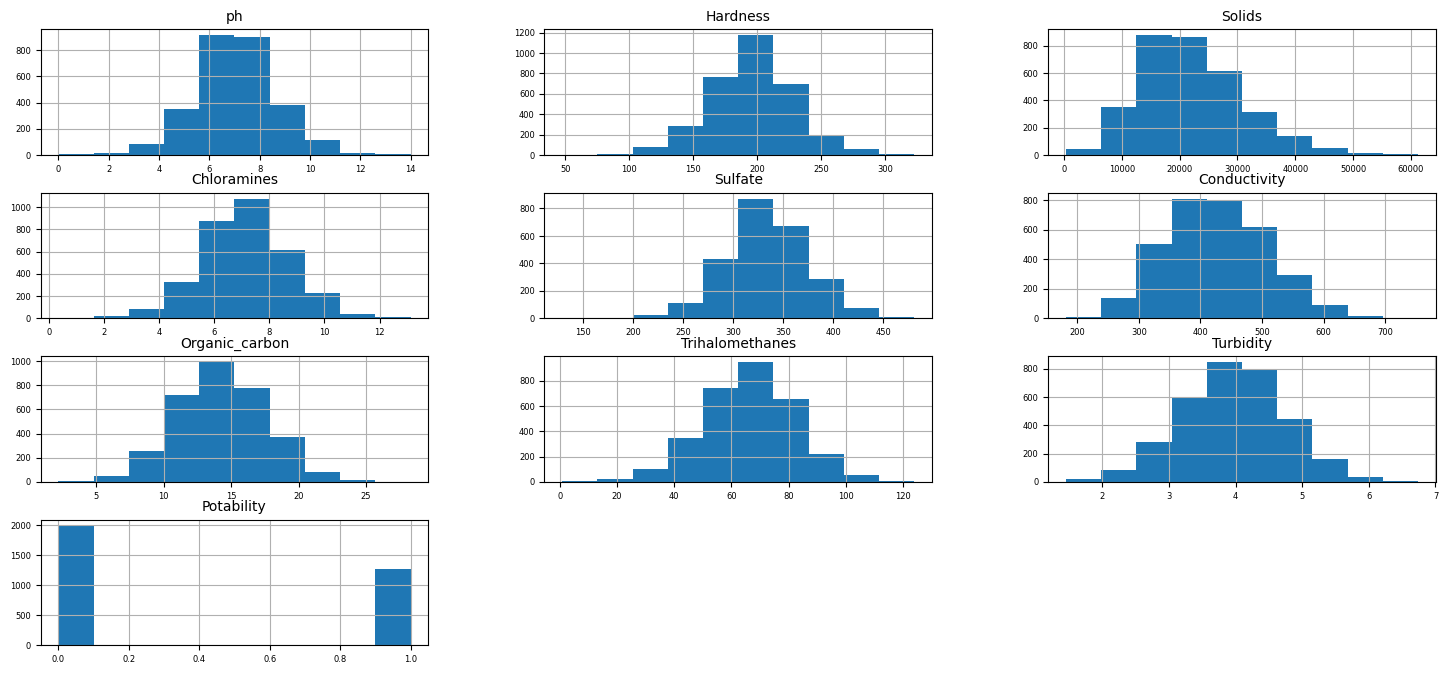

In [5]:
# Reviso comportamiento de las variables
axes = data.hist(figsize=(18, 8));
for ax in axes.flatten():
    ax.set_title(ax.get_title(), fontsize=10)
    ax.tick_params(axis='x', labelsize=6)
    ax.tick_params(axis='y', labelsize=6)

Dado que las variables parecen comportarse de manera gaussiana, se reemplazarán los valores nulos por la media de las variables, para evitar afectar la distribución de estas. 

In [7]:
# Preprocesamiento
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer

X = data.drop(columns='Potability').copy()
y = data.Potability.copy()

# preprocesamiento
fill_cols = ColumnTransformer([
                ('fillna', SimpleImputer(strategy='most_frequent'), X.columns)],
                remainder='passthrough', 
                verbose_feature_names_out=False)
fill_cols.set_output(transform='pandas')

cols_nan = X.columns[X.isna().any()].tolist()
standard_sc = Pipeline([('fillna_cols', fill_cols),
                    ('standard', StandardScaler())])
X = standard_sc.fit_transform(X)

In [9]:
# Split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
                                            X, y, test_size=0.3, random_state=29, 
                                            shuffle=True)

In [ ]:
# from feature_engine.selection import DropConstantFeatures

# transformer = DropConstantFeatures(tol=0.8)
# transformer.fit_transform(X_train)

# transformer.features_to_drop_

In [ ]:
# from feature_engine.selection import SmartCorrelatedSelection

# corr_identifier = SmartCorrelatedSelection(
#     variables=None,
#     method="pearson",
#     threshold=0.8,
#     selection_method="variance",
#     estimator=None,
# )

# corr_identifier.fit_transform(X_train)
# print('correlacionadas: ',corr_identifier.correlated_feature_sets_)
# print('variable retenida: ', corr_identifier.correlated_feature_dict_)


Considerando una tolerancia de 0.8, es posible decir que ninguna variable se puede considerar constante o quasiconstante.

In [ ]:
# !pip install xgboost
# !pip install optuna
# !pip install optuna-integration[xgboost]

In [11]:
import mlflow
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Nombre del experimento
exp_name='XGB_Clf'
mlflow.set_experiment(exp_name)

<Experiment: artifact_location='file:///C:/Users/caron/OneDrive/Escritorio/MDS/II_Sem/Lab/Labs_MDS/lab12/mlruns/530351252435999800', creation_time=1732929995341, experiment_id='530351252435999800', last_update_time=1732929995341, lifecycle_stage='active', name='XGB_Clf', tags={}>

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Funcion a optimizar
def objective_function(trial):

    # Hyperparameters to tune
    xgb_params = {
            "objective": "binary:logistic",
            "n_estimators": trial.suggest_int("n_estimators", 10, 500),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            'max_leaves': trial.suggest_int("max_leaves", 3, 30),
            "grow_policy": trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
            "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1, log=True),
            "n_jobs": trial.suggest_int('n_jobs', 1, 3),
            "gamma": trial.suggest_float("gamma", 0, 1),
            "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        }


    # Train model
    model = XGBClassifier(seed=29, **xgb_params)
    model.fit( X_train, y_train,
            eval_set=[(X_train, y_train), (X_valid, y_valid)],)
    
    # Predict and evaluate the model
    yhat = model.predict(X_valid)
    f1 = f1_score(y_valid, yhat, average='weighted')

    run_name = f"XGB_con_lr_{xgb_params['learning_rate']:.5f}_n_estimators_{xgb_params['n_estimators']}\
                _Mdepth_{xgb_params['max_depth']}_Mleaves_{xgb_params['max_leaves']}"
    
    with mlflow.start_run(run_name=run_name):
        # cargo los parametros y metricas a mlflow 
        mlflow.log_params(xgb_params)
        mlflow.log_metric('valid_f1', f1)
        mlflow.sklearn.log_model(model, "model")

    return f1


In [14]:
# Devolver el mejor modelo** usando la función `get_best_model` y 
# serializarlo en el disco con `pickle.dump`. Luego, guardar el modelo en la carpeta `/models`.
def get_best_model(experiment_id):
    runs = mlflow.search_runs(experiment_id)
    best_model_id = runs.sort_values("metrics.valid_f1")["run_id"].iloc[0]
    best_model = mlflow.sklearn.load_model(f"runs:/{best_model_id}/model")
    return best_model

In [15]:
# Busca el id del experimento según su nombre
def search_id(exp_name):
    return dict(mlflow.get_experiment_by_name(exp_name))['experiment_id']

[I 2024-11-29 23:14:16,318] A new study created in memory with name: no-name-5e38176d-2ba4-42df-a461-8f1bf5508326


[0]	validation_0-logloss:0.66755	validation_1-logloss:0.66570
[1]	validation_0-logloss:0.66585	validation_1-logloss:0.66452
[2]	validation_0-logloss:0.66365	validation_1-logloss:0.66330
[3]	validation_0-logloss:0.66119	validation_1-logloss:0.66201
[4]	validation_0-logloss:0.65938	validation_1-logloss:0.66094
[5]	validation_0-logloss:0.65817	validation_1-logloss:0.66040
[6]	validation_0-logloss:0.65622	validation_1-logloss:0.65936
[7]	validation_0-logloss:0.65497	validation_1-logloss:0.65867
[8]	validation_0-logloss:0.65296	validation_1-logloss:0.65810
[9]	validation_0-logloss:0.65054	validation_1-logloss:0.65665
[10]	validation_0-logloss:0.64873	validation_1-logloss:0.65572
[11]	validation_0-logloss:0.64768	validation_1-logloss:0.65548
[12]	validation_0-logloss:0.64677	validation_1-logloss:0.65539
[13]	validation_0-logloss:0.64445	validation_1-logloss:0.65424
[14]	validation_0-logloss:0.64238	validation_1-logloss:0.65346
[15]	validation_0-logloss:0.64037	validation_1-logloss:0.65254
[1

2024/11/29 23:14:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:14:26,721] Trial 0 finished with value: 0.6229586690082737 and parameters: {'n_estimators': 287, 'max_depth': 4, 'max_leaves': 18, 'grow_policy': 'lossguide', 'learning_rate': 0.03681147902554641, 'n_jobs': 3, 'gamma': 0.33349722164772355, 'min_child_weight': 7, 'subsample': 0.9278282854792219, 'colsample_bytree': 0.8851582752734771}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.03681_n_estimators_287                _Mdepth_4_Mleaves_18 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/d02a7bb2a821465587d64dc585199b09
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66922	validation_1-logloss:0.66664
[1]	validation_0-logloss:0.66887	validation_1-logloss:0.66649
[2]	validation_0-logloss:0.66844	validation_1-logloss:0.66620
[3]	validation_0-logloss:0.66820	validation_1-logloss:0.66615
[4]	validation_0-logloss:0.66781	validation_1-logloss:0.66594
[5]	validation_0-logloss:0.66757	validation_1-logloss:0.66590
[6]	validation_0-logloss:0.66719	validation_1-logloss:0.66566
[7]	validation_0-logloss:0.66692	validation_1-logloss:0.66554
[8]	validation_0-logloss:0.66673	validation_1-logloss:0.66554
[9]	validation_0-logloss:0.66637	validation_1-logloss:0.66537
[10]	validation_0-logloss:0.66600	validation_1-logloss:0.66523
[11]	validation_0-logloss:0.66568	validation_1-logloss:0.665

2024/11/29 23:14:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:14:37,531] Trial 1 finished with value: 0.5317073173788697 and parameters: {'n_estimators': 247, 'max_depth': 5, 'max_leaves': 15, 'grow_policy': 'lossguide', 'learning_rate': 0.005772015938664089, 'n_jobs': 2, 'gamma': 0.32183203663096793, 'min_child_weight': 7, 'subsample': 0.9065441712047081, 'colsample_bytree': 0.510957568932177}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.00577_n_estimators_247                _Mdepth_5_Mleaves_15 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/b6ca3a7cd09547a08defee51b166366e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66754	validation_1-logloss:0.66533
[1]	validation_0-logloss:0.66555	validation_1-logloss:0.66411
[2]	validation_0-logloss:0.66342	validation_1-logloss:0.66280
[3]	validation_0-logloss:0.66147	validation_1-logloss:0.66166
[4]	validation_0-logloss:0.65936	validation_1-logloss:0.66050
[5]	validation_0-logloss:0.65768	validation_1-logloss:0.65976
[6]	validation_0-logloss:0.65634	validation_1-logloss:0.65919
[7]	validation_0-logloss:0.65457	validation_1-logloss:0.65814
[8]	validation_0-logloss:0.65268	validation_1-logloss:0.65716
[9]	validation_0-logloss:0.65093	validation_1-logloss:0.65621
[10]	validation_0-logloss:0.64980	validation_1-logloss:0.65568
[11]	validation_0-logloss:0.64834	validation_1-logloss:0.655

2024/11/29 23:14:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:14:48,090] Trial 2 finished with value: 0.6160031704446801 and parameters: {'n_estimators': 203, 'max_depth': 5, 'max_leaves': 19, 'grow_policy': 'lossguide', 'learning_rate': 0.019604904179075774, 'n_jobs': 2, 'gamma': 0.09839449389683408, 'min_child_weight': 1, 'subsample': 0.9862009335061621, 'colsample_bytree': 0.9921603825542303}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.01960_n_estimators_203                _Mdepth_5_Mleaves_19 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/2a7ea6023daf4de089730196eb500a8e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66956	validation_1-logloss:0.66678
[1]	validation_0-logloss:0.66950	validation_1-logloss:0.66674
[2]	validation_0-logloss:0.66939	validation_1-logloss:0.66665
[3]	validation_0-logloss:0.66927	validation_1-logloss:0.66656
[4]	validation_0-logloss:0.66919	validation_1-logloss:0.66650
[5]	validation_0-logloss:0.66913	validation_1-logloss:0.66647
[6]	validation_0-logloss:0.66903	validation_1-logloss:0.66642
[7]	validation_0-logloss:0.66897	validation_1-logloss:0.66639
[8]	validation_0-logloss:0.66894	validation_1-logloss:0.66639
[9]	validation_0-logloss:0.66889	validation_1-logloss:0.66637
[10]	validation_0-logloss:0.66884	validation_1-logloss:0.66635
[11]	validation_0-logloss:0.66880	validation_1-logloss:0.666

2024/11/29 23:14:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:14:58,116] Trial 3 finished with value: 0.46770652446345273 and parameters: {'n_estimators': 78, 'max_depth': 6, 'max_leaves': 3, 'grow_policy': 'lossguide', 'learning_rate': 0.004681440064251209, 'n_jobs': 2, 'gamma': 0.8923720123444759, 'min_child_weight': 6, 'subsample': 0.7103163032126323, 'colsample_bytree': 0.7256684993827064}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.00468_n_estimators_78                _Mdepth_6_Mleaves_3 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/e745789745b842668d00913015ecd070
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66654	validation_1-logloss:0.66495
[1]	validation_0-logloss:0.66370	validation_1-logloss:0.66281
[2]	validation_0-logloss:0.66067	validation_1-logloss:0.66091
[3]	validation_0-logloss:0.65693	validation_1-logloss:0.65846
[4]	validation_0-logloss:0.65407	validation_1-logloss:0.65700
[5]	validation_0-logloss:0.65182	validation_1-logloss:0.65648
[6]	validation_0-logloss:0.64933	validation_1-logloss:0.65495
[7]	validation_0-logloss:0.64693	validation_1-logloss:0.65324
[8]	validation_0-logloss:0.64456	validation_1-logloss:0.65243
[9]	validation_0-logloss:0.64235	validation_1-logloss:0.65140
[10]	validation_0-logloss:0.64036	validation_1-logloss:0.65049
[11]	validation_0-logloss:0.63852	validation_1-logloss:0.65028

2024/11/29 23:15:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:15:07,679] Trial 4 finished with value: 0.6176110231527786 and parameters: {'n_estimators': 70, 'max_depth': 8, 'max_leaves': 8, 'grow_policy': 'lossguide', 'learning_rate': 0.06160209194971837, 'n_jobs': 2, 'gamma': 0.7311502078867392, 'min_child_weight': 3, 'subsample': 0.9065860629617718, 'colsample_bytree': 0.9462113905805987}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.06160_n_estimators_70                _Mdepth_8_Mleaves_8 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/5f718cb17dd643faab8d2e8e872712ed
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66930	validation_1-logloss:0.66665
[1]	validation_0-logloss:0.66888	validation_1-logloss:0.66641
[2]	validation_0-logloss:0.66845	validation_1-logloss:0.66616
[3]	validation_0-logloss:0.66787	validation_1-logloss:0.66578
[4]	validation_0-logloss:0.66735	validation_1-logloss:0.66542
[5]	validation_0-logloss:0.66695	validation_1-logloss:0.66522
[6]	validation_0-logloss:0.66649	validation_1-logloss:0.66505
[7]	validation_0-logloss:0.66611	validation_1-logloss:0.66479
[8]	validation_0-logloss:0.66572	validation_1-logloss:0.66461
[9]	validation_0-logloss:0.66551	validation_1-logloss:0.66452
[10]	validation_0-logloss:0.66524	validation_1-logloss:0.66439
[11]	validation_0-logloss:0.66493	validation_1-logloss:0.66425

2024/11/29 23:15:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:15:18,624] Trial 5 finished with value: 0.6049700121705105 and parameters: {'n_estimators': 461, 'max_depth': 4, 'max_leaves': 14, 'grow_policy': 'lossguide', 'learning_rate': 0.005999230696193475, 'n_jobs': 3, 'gamma': 0.816665030049023, 'min_child_weight': 1, 'subsample': 0.7192422994075965, 'colsample_bytree': 0.8119372244431444}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.00600_n_estimators_461                _Mdepth_4_Mleaves_14 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/4f76b84f279c47e59a5f28a453c8b1ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66957	validation_1-logloss:0.66681
[1]	validation_0-logloss:0.66948	validation_1-logloss:0.66675
[2]	validation_0-logloss:0.66938	validation_1-logloss:0.66669
[3]	validation_0-logloss:0.66927	validation_1-logloss:0.66661
[4]	validation_0-logloss:0.66915	validation_1-logloss:0.66654
[5]	validation_0-logloss:0.66907	validation_1-logloss:0.66650
[6]	validation_0-logloss:0.66897	validation_1-logloss:0.66645
[7]	validation_0-logloss:0.66887	validation_1-logloss:0.66639
[8]	validation_0-logloss:0.66881	validation_1-logloss:0.66639
[9]	validation_0-logloss:0.66874	validation_1-logloss:0.66635
[10]	validation_0-logloss:0.66868	validation_1-logloss:0.66632
[11]	validation_0-logloss:0.66858	validation_1-logloss:0.666

2024/11/29 23:15:28 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:15:28,893] Trial 6 finished with value: 0.46770652446345273 and parameters: {'n_estimators': 241, 'max_depth': 6, 'max_leaves': 17, 'grow_policy': 'lossguide', 'learning_rate': 0.001040115930311046, 'n_jobs': 3, 'gamma': 0.11147033791184524, 'min_child_weight': 2, 'subsample': 0.6850123687117, 'colsample_bytree': 0.7112742710239799}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.00104_n_estimators_241                _Mdepth_6_Mleaves_17 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/1f68e3aca26f42159dd057f52394c2ba
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66921	validation_1-logloss:0.66667
[1]	validation_0-logloss:0.66889	validation_1-logloss:0.66650
[2]	validation_0-logloss:0.66854	validation_1-logloss:0.66634
[3]	validation_0-logloss:0.66809	validation_1-logloss:0.66603
[4]	validation_0-logloss:0.66765	validation_1-logloss:0.66578
[5]	validation_0-logloss:0.66735	validation_1-logloss:0.66566
[6]	validation_0-logloss:0.66695	validation_1-logloss:0.66547
[7]	validation_0-logloss:0.66657	validation_1-logloss:0.66521
[8]	validation_0-logloss:0.66635	validation_1-logloss:0.66516
[9]	validation_0-logloss:0.66606	validation_1-logloss:0.66501
[10]	validation_0-logloss:0.66580	validation_1-logloss:0.66490
[11]	validation_0-logloss:0.66539	validation_1-logloss:0.664

2024/11/29 23:15:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:15:35,734] Trial 7 finished with value: 0.46770652446345273 and parameters: {'n_estimators': 12, 'max_depth': 9, 'max_leaves': 19, 'grow_policy': 'depthwise', 'learning_rate': 0.004249560068801804, 'n_jobs': 2, 'gamma': 0.9645618503528611, 'min_child_weight': 4, 'subsample': 0.6470003528020534, 'colsample_bytree': 0.7698550582167225}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.00425_n_estimators_12                _Mdepth_9_Mleaves_19 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/569f0231ba8d42fc9d338b01314f427d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66688	validation_1-logloss:0.66531
[1]	validation_0-logloss:0.66423	validation_1-logloss:0.66323
[2]	validation_0-logloss:0.66186	validation_1-logloss:0.66155
[3]	validation_0-logloss:0.65932	validation_1-logloss:0.66015
[4]	validation_0-logloss:0.65702	validation_1-logloss:0.65872
[5]	validation_0-logloss:0.65547	validation_1-logloss:0.65814
[6]	validation_0-logloss:0.65300	validation_1-logloss:0.65608
[7]	validation_0-logloss:0.65110	validation_1-logloss:0.65477
[8]	validation_0-logloss:0.64868	validation_1-logloss:0.65324
[9]	validation_0-logloss:0.64648	validation_1-logloss:0.65190
[10]	validation_0-logloss:0.64492	validation_1-logloss:0.65112
[11]	validation_0-logloss:0.64335	validation_1-logloss:0.6506

2024/11/29 23:15:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:15:45,331] Trial 8 finished with value: 0.606860388788601 and parameters: {'n_estimators': 103, 'max_depth': 5, 'max_leaves': 14, 'grow_policy': 'lossguide', 'learning_rate': 0.03018413596181145, 'n_jobs': 3, 'gamma': 0.39959261163659054, 'min_child_weight': 6, 'subsample': 0.8935043336452184, 'colsample_bytree': 0.9846685771874959}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.03018_n_estimators_103                _Mdepth_5_Mleaves_14 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/ee164a24112c4db1aa96fafd5044de1b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
[0]	validation_0-logloss:0.66923	validation_1-logloss:0.66667
[1]	validation_0-logloss:0.66880	validation_1-logloss:0.66638
[2]	validation_0-logloss:0.66826	validation_1-logloss:0.66605
[3]	validation_0-logloss:0.66771	validation_1-logloss:0.66566
[4]	validation_0-logloss:0.66726	validation_1-logloss:0.66542
[5]	validation_0-logloss:0.66682	validation_1-logloss:0.66521
[6]	validation_0-logloss:0.66633	validation_1-logloss:0.66491
[7]	validation_0-logloss:0.66596	validation_1-logloss:0.66482
[8]	validation_0-logloss:0.66577	validation_1-logloss:0.66481
[9]	validation_0-logloss:0.66533	validation_1-logloss:0.66453
[10]	validation_0-logloss:0.66490	validation_1-logloss:0.66438
[11]	validation_0-logloss:0.66452	validation_1-logloss:0.664

2024/11/29 23:15:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[I 2024-11-29 23:15:55,834] Trial 9 finished with value: 0.5820341678720753 and parameters: {'n_estimators': 416, 'max_depth': 4, 'max_leaves': 6, 'grow_policy': 'depthwise', 'learning_rate': 0.015055138059910302, 'n_jobs': 2, 'gamma': 0.8056264831051088, 'min_child_weight': 3, 'subsample': 0.9254517063404806, 'colsample_bytree': 0.612377984194796}. Best is trial 0 with value: 0.6229586690082737.


🏃 View run XGB_con_lr_0.01506_n_estimators_416                _Mdepth_4_Mleaves_6 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/397308be3d6e4926bdcaf5712cd5ac70
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800


C:\Users\caron\AppData\Local\Temp\ipykernel_16404\3314199628.py:8: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  opti_history = plot_optimization_history(study).figure
C:\Users\caron\AppData\Local\Temp\ipykernel_16404\3314199628.py:14: ExperimentalWarning: plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  parallel = plot_parallel_coordinate(study).figure
C:\Users\caron\AppData\Local\Temp\ipykernel_16404\3314199628.py:19: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  importances = plot_param_importances(study).figure


🏃 View run mysterious-swan-202 at: http://127.0.0.1:5000/#/experiments/530351252435999800/runs/9a04f3400b0645b79bf2f99c5fe59b07
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/530351252435999800
FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.6229586690082737], datetime_start=datetime.datetime(2024, 11, 29, 23, 14, 16, 326860), datetime_complete=datetime.datetime(2024, 11, 29, 23, 14, 26, 721472), params={'n_estimators': 287, 'max_depth': 4, 'max_leaves': 18, 'grow_policy': 'lossguide', 'learning_rate': 0.03681147902554641, 'n_jobs': 3, 'gamma': 0.33349722164772355, 'min_child_weight': 7, 'subsample': 0.9278282854792219, 'colsample_bytree': 0.8851582752734771}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=10, step=1), 'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'max_leaves': IntDistribution(high=30, log=False, low=3, step=1), 'grow_policy': CategoricalDistributio

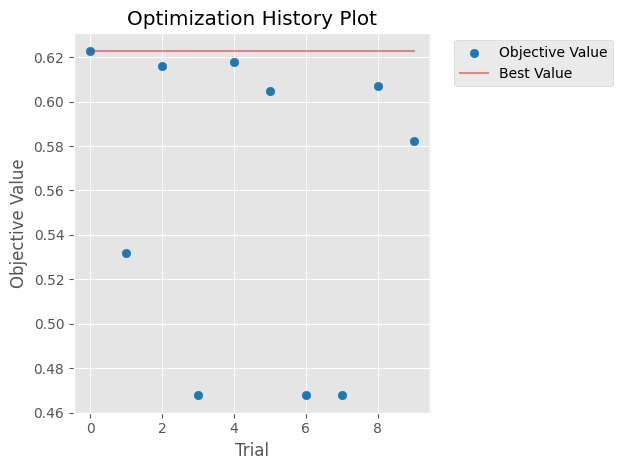

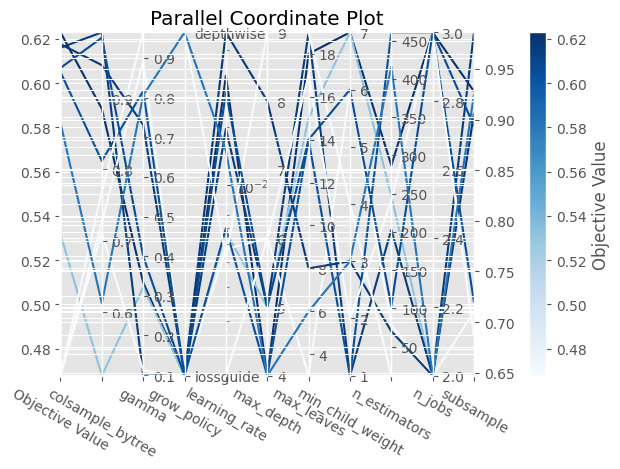

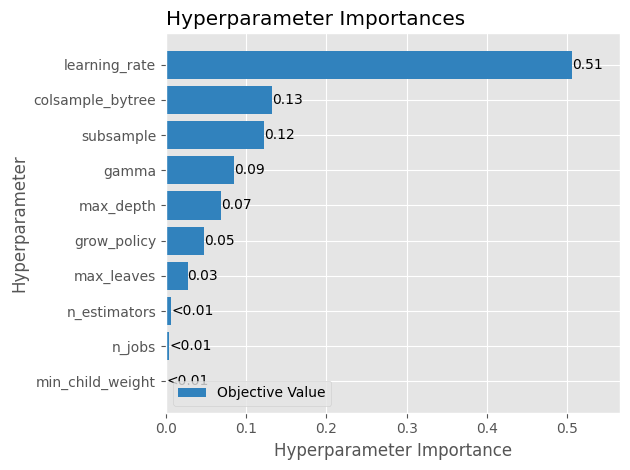

In [26]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_function, n_trials=10)
        
with mlflow.start_run():
        os.makedirs('plots', exist_ok=True)
        # optimization_history
        # el submodulo de matplotlib retorna un Axesplot, no una figura
        opti_history = plot_optimization_history(study).figure 
        opti_history.tight_layout()

        opti_history.savefig('plots/opti_history.png')

        # # parallel coordinate 
        parallel = plot_parallel_coordinate(study).figure
        parallel.tight_layout()
        parallel.savefig('plots/parallel_coordinate.png')

        # # params importances
        importances = plot_param_importances(study).figure
        importances.tight_layout()
        importances.savefig('plots/param_importances.png')
            
        # subo la carpeta plots (local) completa a mlflow
        mlflow.log_artifacts('plots', artifact_path='plots')

best_model = study.best_trial.params
print(study.best_trial)
print('Best model params:', best_model)

exp_id = search_id(exp_name)
best_model = get_best_model(exp_id)

os.makedirs('model', exist_ok=True)
with open('model/best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    

Utilizamos este código como base para crear ``optimize.py``. 

# **2. FastAPI (2.0 puntos)**

<div align="center">
  <img src="https://media3.giphy.com/media/YQitE4YNQNahy/giphy-downsized-large.gif" width="500">
</div>

Con el modelo ya entrenado, la idea de esta sección es generar una API REST a la cual se le pueda hacer *requests* para así interactuar con su modelo. En particular, se le pide:

- Guardar el código de esta sección en el archivo `main.py`. Note que ejecutar `python main.py` debería levantar el servidor en el puerto por defecto.
- Defina `GET` con ruta tipo *home* que describa brevemente su modelo, el problema que intenta resolver, su entrada y salida.
- Defina un `POST` a la ruta `/potabilidad/` donde utilice su mejor optimizado para predecir si una medición de agua es o no potable. Por ejemplo, una llamada de esta ruta con un *body*:

```json
{
   "ph":10.316400384553162,
   "Hardness":217.2668424334475,
   "Solids":10676.508475429378,
   "Chloramines":3.445514571005745,
   "Sulfate":397.7549459751925,
   "Conductivity":492.20647361771086,
   "Organic_carbon":12.812732207582542,
   "Trihalomethanes":72.28192021570328,
   "Turbidity":3.4073494284238364
}
```

Su servidor debería retornar una respuesta HTML con código 200 con:


```json
{
  "potabilidad": 0 # respuesta puede variar según el clasificador que entrenen
}
```

**`HINT:` Recuerde que puede utilizar [http://localhost:8000/docs](http://localhost:8000/docs) para hacer un `POST`.**

# **3. Docker (2 puntos)**

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1400/1*9rafh2W0rbRJIKJzqYc8yA.gif" width="500">
</div>

Tras el éxito de su aplicación web para generar la salida, Smapina le solicita que genere un contenedor para poder ejecutarla en cualquier computador de la empresa de agua potable.

## **3.1 Creación de Container (1 punto)**

Cree un Dockerfile que use una imagen base de Python, copie los archivos del proyecto e instale las dependencias desde un `requirements.txt`. Con esto, construya y ejecute el contenedor Docker para la API configurada anteriormente. Entregue el código fuente (incluyendo `main.py`, `requirements.txt`, y `Dockerfile`) y la imagen Docker de la aplicación. Para la dockerización, asegúrese de cumplir con los siguientes puntos:

1. **Generar un archivo `.dockerignore`** que ignore carpetas y archivos innecesarios dentro del contenedor.
2. **Configurar un volumen** que permita la persistencia de los datos en una ruta local del computador.
3. **Exponer el puerto** para acceder a la ruta de la API sin tener que entrar al contenedor directamente.
4. **Incluir imágenes en el notebook** que muestren la ejecución del contenedor y los resultados obtenidos.
5. **Revisar y comentar los recursos utilizados por el contenedor**. Analice si los contenedores son livianos en términos de recursos.


5. La imagen pesa alrededor de 1.8GB y el contenedor nacido desde ahí esta consumiendo un 0.18% de la CPU, en standby, es decir con la API corriendo sin hacer prediciones. En conclusión, son muy livianos, fáciles de montar, de crear y compartir. Son ideales para aplicaciones de microservicios.


## **3.2 Preguntas de Smapina (1 punto)**
Tras haber experimentado con Docker, Smapina desea profundizar más en el tema y decide realizarle las siguientes consultas:

- ¿Cómo se diferencia Docker de una máquina virtual (VM)?
- ¿Cuál es la diferencia entre usar Docker y ejecutar la aplicación directamente en el sistema local?
- ¿Cómo asegura Docker la consistencia entre diferentes entornos de desarrollo y producción?
- ¿Cómo se gestionan los volúmenes en Docker para la persistencia de datos?
- ¿Qué son Dockerfile y docker-compose.yml, y cuál es su propósito?

1. La maquina virtual simula con recursos físicos, todos los recursos virtuales que necesita una maquina para funcionar, sistema operativo para arriba. En cambio Docker y sus contenedores utilizan el kernel y, por lo tanto, ciertos recursos físicos del sistema huesped. DOcker es más liviano y versatil que las VM.

2. Que si el programa esta sujeto a distintas especificaciones de software puede ser engorroso montar un ambiente en el sistema local. Si se levantan varias aplicaciones en este sistema pueden haber choques graves de versionamiento para una u otra aplicación. En cambio Docker permite aislar o compartimentalizar un ambientes dedicado para la aplicación que se necesite. Ambiente en un amplio sentido, desde el sistema operativo, hasta softwares o librerias requeridas.

3. Gracias a los Dockerfiles y las Imagenes se puede tener un seguimiento de todos los recursos que necesita la aplicación en desarrollo, a la vez que su versionamiento en constante avance. Más aún, una vez definido los requisitos de una nueva versión, y relaciones que tendran distintas imagenes entre si es posible orquestar una puesta en producción rápida y confiable en ambientes de producción, gracias a sus contendores y archivos docker-compose.yml. En caso de que una nueva versión fallé por cualquier razón, volver a la versión depende solamente volver a activar la Imagen o Imagenes anteriores como es debido.

4. Los volumen generados se mantiene de manera independiente al contenedor que lo genera o utiliza. Puede persistir y ser reutilizado por un siguiente contenedor. Esto funcina porque Docker destina una porción etiquetada (o anonima) de disco para guardar las transacciones que se generen en el contenedor que lo utilize.  

5. Dockerfile es un archivo utilizado por Docker para crear una Imagen de Docker, es un instructivo para diseñar un cuasi-ambiente virtual con todos los requerimientos e instrucciones necesarias para levantar un servicio, la Imagen luego es capaz de montar un contenedor, recursos dedicados a este mini-SO con un puerto definido para la comunicación con el host.  docker-compose.yml es un archivo de texto, un instructivo para generar varios contenedores, y las relaciones que tendrán entre ellos. Algo asi como varios servidores conectados por puertos que comparten distinto tipo de información y/o procesos. Esto permite orquestar el levantamiento de una aplicación, con todas sus partes de manera automatizada. 

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

<div align="center">
  <img src="https://i.pinimg.com/originals/84/5d/f1/845df1aefc6a5e37ae575327a0cc6e43.gif" width="500">
</div>